In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas_ta as ta

#print(os.getcwd())
#df = pd.read_csv('demo/tutorial.csv', delimiter=';')
df_1 = pd.read_csv('training/prices_round_3_day_0.csv', delimiter=';')
df_2 = pd.read_csv('training/prices_round_3_day_1.csv', delimiter=';')
df_3 = pd.read_csv('training/prices_round_3_day_2.csv', delimiter=';')

# Append DF
df = df_1.append(df_2).append(df_3)
df.reset_index(drop=True, inplace=True)

#df['median_price'] = df.apply(lambda row: np.median([i for i in [row['bid_price_1'], row['bid_price_2'], row['bid_price_3'], row['ask_price_1'], row['ask_price_2'], row['ask_price_3']] if i > 0.0]), axis=1)


df


C:\Users\yinki\AppData\Local\Temp\ipykernel_19672\3392674760.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_1.append(df_2).append(df_3)


,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,0,CHOCOLATE,7999,111,NaN,NaN,NaN,NaN,8001,111,NaN,NaN,NaN,NaN,8000.0,0.0
1,0,0,STRAWBERRIES,3999,210,NaN,NaN,NaN,NaN,4001,210,NaN,NaN,NaN,NaN,4000.0,0.0
2,0,0,ROSES,14999,72,NaN,NaN,NaN,NaN,15001,72,NaN,NaN,NaN,NaN,15000.0,0.0
3,0,0,GIFT_BASKET,71348,19,71347.0,24.0,NaN,NaN,71362,19,71363.0,24.0,NaN,NaN,71355.0,0.0
4,0,100,GIFT_BASKET,71344,1,71343.0,12.0,71342.0,20.0,71355,1,71356.0,12.0,71357.0,20.0,71349.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,2,999800,GIFT_BASKET,69537,2,69536.0,18.0,69535.0,24.0,69547,2,69548.0,18.0,69550.0,24.0,69542.0,0.0
119996,2,999900,CHOCOLATE,7749,143,NaN,NaN,NaN,NaN,7751,143,NaN,NaN,NaN,NaN,7750.0,0.0
119997,2,999900,GIFT_BASKET,69551,1,69550.0,19.0,69549.0,20.0,69561,1,69562.0,19.0,69564.0,20.0,69556.0,0.0
119998,2,999900,STRAWBERRIES,3984,240,NaN,NaN,NaN,NaN,3985,92,3986.0,148.0,NaN,NaN,3984.5,0.0


In [2]:
choc_df = df[df['product'] == 'CHOCOLATE'].reset_index(drop=True)
straw_df = df[df['product'] == 'STRAWBERRIES'].reset_index(drop=True)
roses_df = df[df['product'] == 'ROSES'].reset_index(drop=True)
basket = df[df['product'] == 'GIFT_BASKET'].reset_index(drop=True)


choc = pd.DataFrame(choc_df['mid_price'] * 4).rename(columns={'mid_price': 'choc'})
straw = pd.DataFrame(straw_df['mid_price'] * 6).rename(columns={'mid_price': 'straw'})
roses = pd.DataFrame(roses_df['mid_price']).rename(columns={'mid_price': 'roses'})
basket = pd.DataFrame(basket['mid_price']).rename(columns={'mid_price': 'basket'})


df_combined = pd.concat([choc, straw, roses, basket], axis=1)
df_combined

,choc,straw,roses,basket
0,32000.0,24000.0,15000.0,71355.0
1,32006.0,23997.0,15000.0,71349.5
2,32004.0,23997.0,15000.5,71347.0
3,32010.0,23997.0,15000.0,71350.5
4,32008.0,23997.0,14997.5,71341.5
...,...,...,...,...
29995,31002.0,23901.0,14409.5,69534.5
29996,31002.0,23901.0,14408.0,69529.5
29997,31002.0,23907.0,14411.5,69543.0
29998,31000.0,23907.0,14412.5,69542.0


In [3]:
df_combined.corr()

,choc,straw,roses,basket
choc,1.000000,0.273545,0.826358,0.947339
straw,0.273545,1.000000,0.148667,0.498003
roses,0.826358,0.148667,1.000000,0.850830
basket,0.947339,0.498003,0.850830,1.000000


In [15]:
# Cointrgration Test individual products agaisnt basket
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05):
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)
        
cointegration_test(df_combined)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
choc   ::  18516.95  > 60.0627   =>   True
straw  ::  53.09     > 40.1749   =>   True
roses  ::  26.52     > 24.2761   =>   True
basket ::  10.02     > 12.3212   =>   False
basket intercept ::  3.02      > 4.1296    =>   False


Mean Squared Error: 6531.813072608242
Coefficients: [0.95879753 1.00122631 1.00959939]
Intercept: 1521.7313331703626


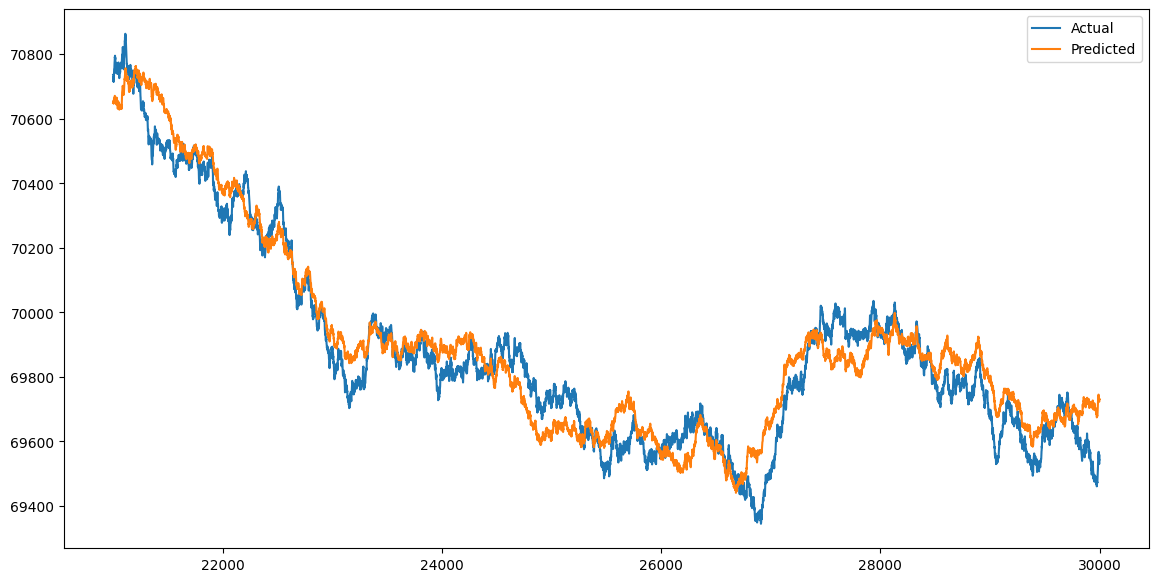

In [4]:
# Build Multivariate Linear Regression Model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNetCV


X = df_combined[['choc', 'straw', 'roses']]
y = df_combined['basket']

X_train, X_test, y_train, y_test = X[:int(len(X)*0.7)], X[int(len(X)*0.7):], y[:int(len(y)*0.7)], y[int(len(y)*0.7):]

# Train the model
model = ElasticNetCV(cv=5)
model.fit(X_train, y_train)

# Make predictions
y_pred = pd.Series(model.predict(X_test))
y_pred.index = y_test.index

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


# Plot graph of predictions
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()


<Axes: >

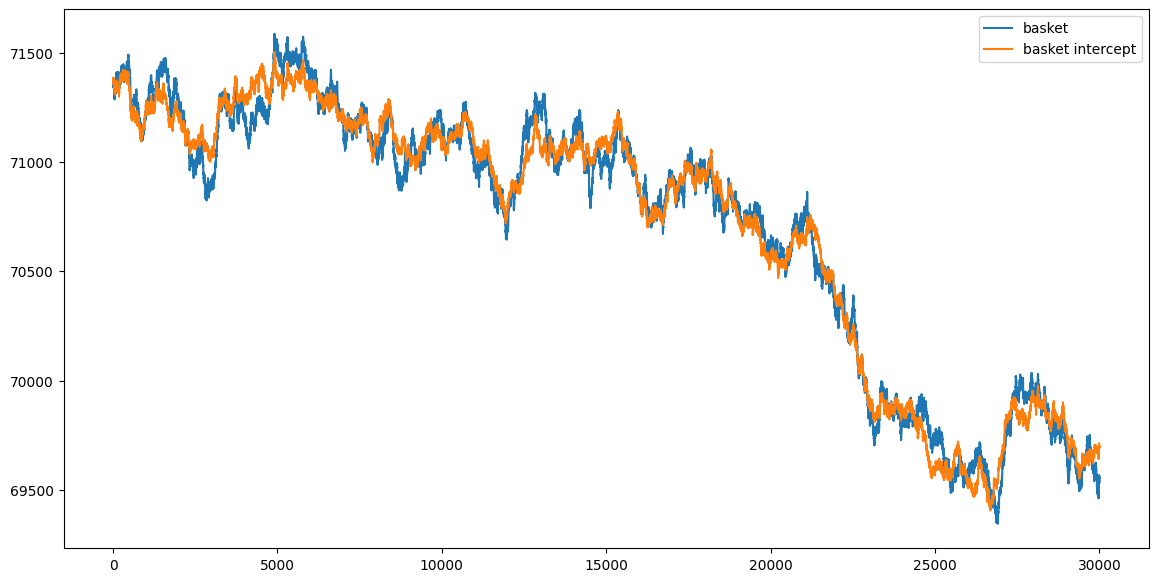

In [5]:
# Intercept = 1521
df_combined['basket intercept'] = df_combined['choc'] + df_combined['straw'] + df_combined['roses'] + 379
df_combined[['basket', 'basket intercept']].plot(figsize=(14, 7))



Mean Squared Error: 9012.662424652017
Coefficients: [0.94969798]
Intercept: 3573.5348967041064


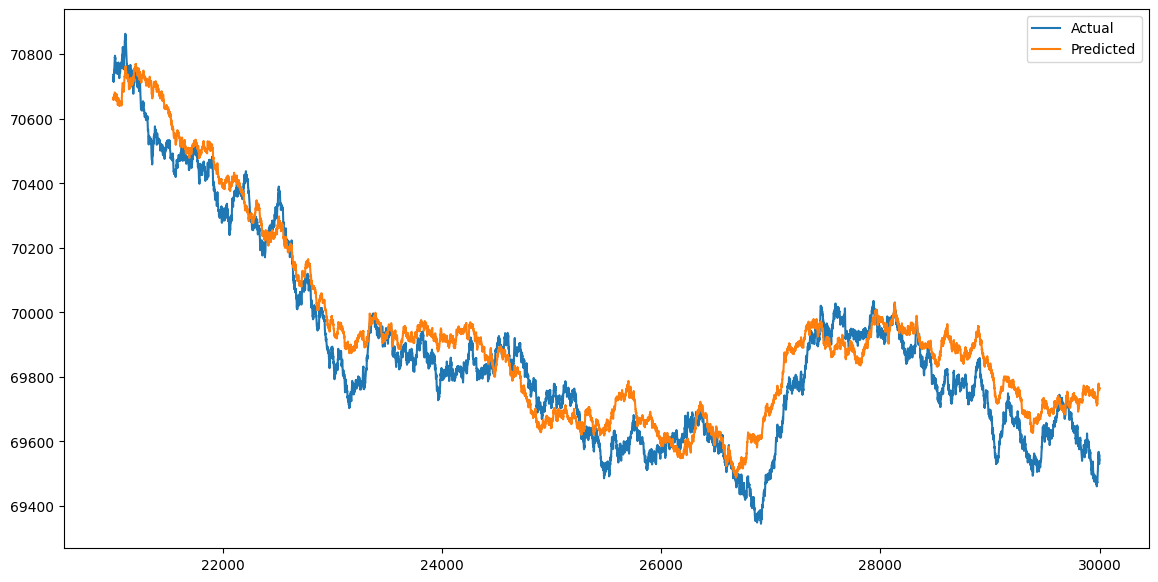

In [6]:
X = df_combined[['basket intercept']]
y = df_combined['basket']

X_train, X_test, y_train, y_test = X[:int(len(X)*0.7)], X[int(len(X)*0.7):], y[:int(len(y)*0.7)], y[int(len(y)*0.7):]

# Train the model
model = ElasticNetCV(cv=5, l1_ratio=[0.01, 0.1, 0.5, 0.9, 0.99]).set_params(max_iter=10000)
model.fit(X_train, y_train)

# Make predictions
y_pred = pd.Series(model.predict(X_test))
y_pred.index = y_test.index

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


# Plot graph of predictions
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

379.4904833333333

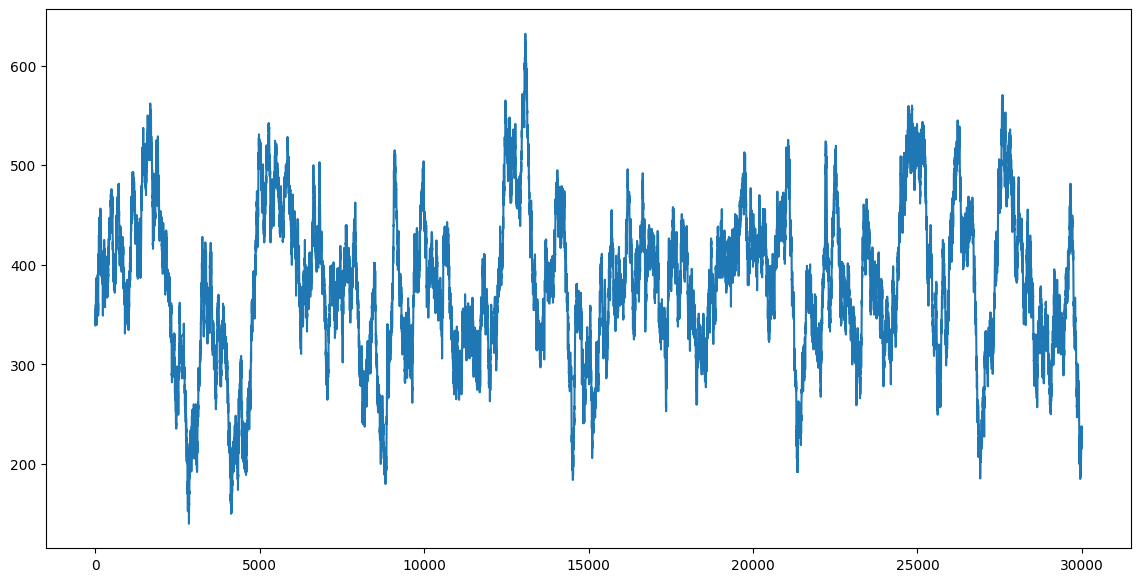

In [7]:
intercept = df_combined['basket'] - (df_combined['choc'] + df_combined['straw'] + df_combined['roses'])
intercept.plot(figsize=(14, 7))

intercept.mean()


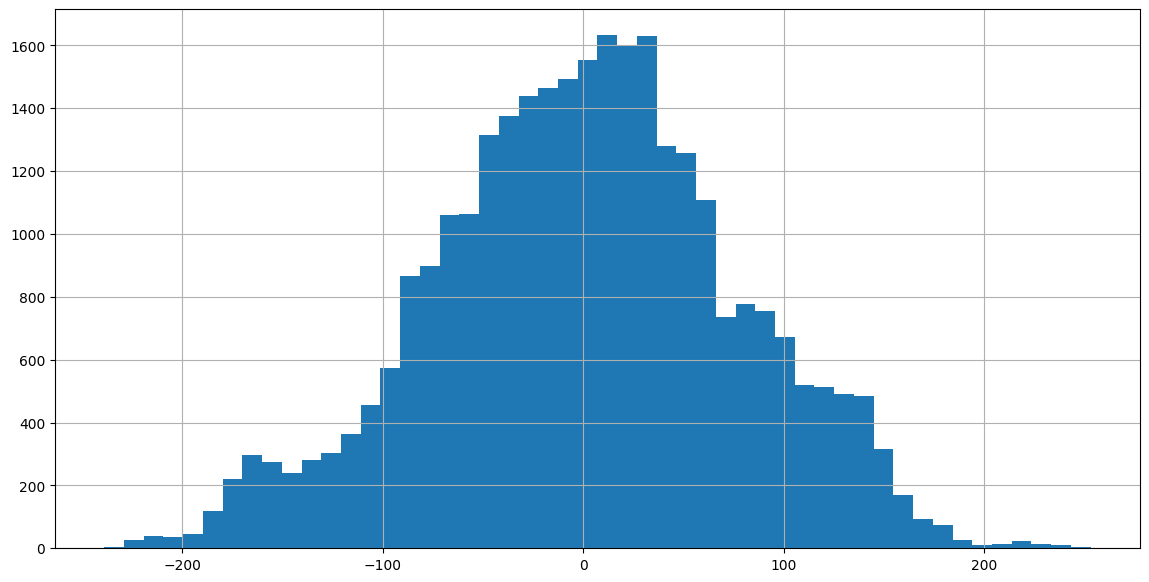

Mean: 0.4904833333333333
Standard Deviation: 76.42438217375009


In [8]:
# Plot graph of histogram of differences
plt.figure(figsize=(14, 7))
residuals = df_combined['basket'] - df_combined['basket intercept']
residuals.hist(bins=50)
plt.show()


# Get statistics out of the residuals, mean, standard deviation
print("Mean:", residuals.mean())
print("Standard Deviation:", residuals.std())

In [9]:
choc['SMA5'] = choc['choc'].rolling(window=5).mean()
choc.dropna(inplace=True)


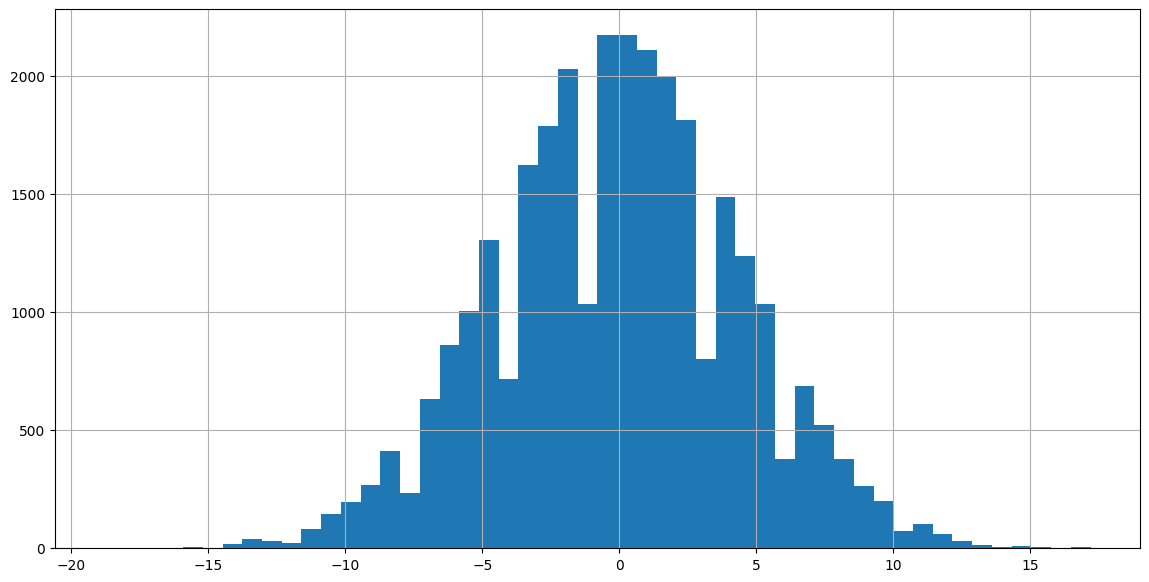

Mean: -0.06706227497000178
Standard Deviation: 4.4335425227244505


In [10]:
choc.reset_index(drop=True, inplace=True)
choc['Diff'] = choc['choc'] - choc['SMA5']

# Plot histogram of differences
plt.figure(figsize=(14, 7))
choc['Diff'].hist(bins=50)
plt.show()

# print statistics
print("Mean:", choc['Diff'].mean())
print("Standard Deviation:", choc['Diff'].std())

In [11]:
df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,0,CHOCOLATE,7999,111,NaN,NaN,NaN,NaN,8001,111,NaN,NaN,NaN,NaN,8000.0,0.0
1,0,0,STRAWBERRIES,3999,210,NaN,NaN,NaN,NaN,4001,210,NaN,NaN,NaN,NaN,4000.0,0.0
2,0,0,ROSES,14999,72,NaN,NaN,NaN,NaN,15001,72,NaN,NaN,NaN,NaN,15000.0,0.0
3,0,0,GIFT_BASKET,71348,19,71347.0,24.0,NaN,NaN,71362,19,71363.0,24.0,NaN,NaN,71355.0,0.0
4,0,100,GIFT_BASKET,71344,1,71343.0,12.0,71342.0,20.0,71355,1,71356.0,12.0,71357.0,20.0,71349.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,2,999800,GIFT_BASKET,69537,2,69536.0,18.0,69535.0,24.0,69547,2,69548.0,18.0,69550.0,24.0,69542.0,0.0
119996,2,999900,CHOCOLATE,7749,143,NaN,NaN,NaN,NaN,7751,143,NaN,NaN,NaN,NaN,7750.0,0.0
119997,2,999900,GIFT_BASKET,69551,1,69550.0,19.0,69549.0,20.0,69561,1,69562.0,19.0,69564.0,20.0,69556.0,0.0
119998,2,999900,STRAWBERRIES,3984,240,NaN,NaN,NaN,NaN,3985,92,3986.0,148.0,NaN,NaN,3984.5,0.0


In [12]:
# Using Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

CURR_MIN = 10000000
Y_PRED = None
CURR_N = 0
Y_TEST = None
best_coef = None
model_intercept = None
Y_TRAIN = None
Y_TRAIN_PRED = None
best_mape = 10000000
best_bic = 10000000
# Using Grid Search to find the best parameters for Xt = bXt-1 + cXt-2 + ... + dXt-n + e, where n is the number of lags, and Xt is itself
directional_accuracy = {}

results = {
    'n': [],
    'mse': [],
    'mape': [],
    'rsquared': [],
    'bic': [],
    'coefficients': [],
    'intercept': [],
    'Y_PRED': [],
    'Y_TEST': [],
    'Y_TRAIN': [],
    'Y_TRAIN_PRED': [],
    'Type': []
    
}

p2_df = df[df['product'] == 'CHOCOLATE'][['mid_price']]
for n in range(1, 20):
    X = pd.DataFrame(p2_df['mid_price'])
    for i in range(1, n+1):
        curr_cols = X.columns   
        X = pd.concat([X, p2_df['mid_price'].shift(i)], axis=1) # Shift the mid price by i periods and concatenate to X # change column name
        X.columns = curr_cols.append(pd.Index([f'lag_{i}'])) # Change the column name to lag_i
    X = X.shift(1)
    X.dropna(inplace=True)
    X = X.reset_index(drop=True) # Drop the rows with NaN values
    y = X['mid_price']
    X = X.iloc[:, 1:]
    

    
    #print(X.head())
    #print(y.head())
    #print(X.shape, y.shape)
    
    # Add a constant to the X matrix
    X = sm.add_constant(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    model = ElasticNetCV(cv=5, random_state=0, l1_ratio=[.1, .5, .7, .9, .95, .99, 1], fit_intercept=False)
    model2 = sm.GLM(y_train, X_train, family=sm.families.Gaussian())
    
    model2 = model2.fit()
    model.fit(X_train, y_train)
    #print(f"X Coefficients: ")
    #print(model.coef_)
    #print(f"X Intercept: ")
    #print(model.intercept_)
    
    
    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    rsquared = model.score(X_test, y_test)
    print()
    
    y_pred_train2 = model2.predict(X_train)
    y_pred2 = model2.predict(X_test)
    mse2 = mean_squared_error(y_test, y_pred2)
    mape2 = np.mean(np.abs((y_test - y_pred2) / y_test)) * 100
    #print(model2.summary())
    rsquared2 = model2.pseudo_rsquared()
    
    print()
    
    
    # For Elastic Net
    print(f"n={n}, mse={mse} mape={mape} rsquared={rsquared}")
    print(f"Model Alpha: {model.alpha_} Model L1 Ratio: {model.l1_ratio_}")
    BIC = len(y_test) * np.log(mse) + n * np.log(len(y_test))
    print(f"n={n}, BIC={BIC}")
    count = 0
    y_pred = pd.Series(y_pred)
    y_pred.index = y_test.index
    
    
    # For GLM
    print(f"n={n}, mse={mse2} mape={mape2} rsquared={rsquared2}")
    print(f"Model Intercept: {model2.params[0]}")
    BIC2 = model2.bic
    print(f"n={n}, BIC={BIC2}")
    count = 0
    y_pred2 = pd.Series(y_pred2)
    y_pred2.index = y_test.index
    
    
    for i in range(1, len(y_test)):
        if (y_test.iloc[i] -y_test.iloc[i-1]) * (y_pred.iloc[i] - y_test.iloc[i-1]) > 0:
            count += 1
    directional_accuracy[n] = count/len(y_test)
    
    # Store the results elastic net
    results['n'].append(n)
    results['mse'].append(mse)
    results['mape'].append(mape)
    results['rsquared'].append(rsquared)
    results['bic'].append(BIC)
    results['coefficients'].append(list(model.coef_))
    results['intercept'].append(model.intercept_)
    results['Y_PRED'].append(y_pred)
    results['Y_TEST'].append(y_test)
    results['Y_TRAIN'].append(y_train)
    results['Y_TRAIN_PRED'].append(y_pred_train)
    results['Type'].append('Elastic Net')
    
    
    # Store results for GLM
    # results['n'].append(n)
    # results['mse'].append(mse2)
    # results['mape'].append(mape2)
    # results['rsquared'].append(rsquared2)
    # results['bic'].append(BIC2)
    # results['coefficients'].append(list(model2.params))
    # results['intercept'].append(model2.params[0])
    # results['Y_PRED'].append(y_pred2)
    # results['Y_TEST'].append(y_test)
    # results['Y_TRAIN'].append(y_train)
    # results['Y_TRAIN_PRED'].append(y_pred_train2)
    # results['Type'].append('GLM')
    
    
    
#print(f"Best n: {CURR_N}, Best MSE: {CURR_MIN}")
#print(f"Best Coefficients: {list(best_coef)}")
#print(f"Model Intercept: {model.intercept_}")

# Get the best results getting the minimum model with the lowest sum rankings of mse, mape, rsquared and bic
best_results = pd.DataFrame(results)
best_results['mse_rank'] = best_results['mse'].rank(ascending=False)
best_results['mape_rank'] = best_results['mape'].rank(ascending=False)
best_results['rsquared_rank'] = best_results['rsquared'].rank(ascending=False)
best_results['bic_rank'] = best_results['bic'].rank(ascending=True)
best_results['sum_rank'] = best_results['mse_rank'] + best_results['mape_rank'] + best_results['bic_rank'] + best_results['rsquared_rank']
best_results.sort_values('sum_rank', inplace=True)
best_results.reset_index(drop=True)

# Get the best results
print(best_results.head(10))

print(f"Best n: {best_results['n'].iloc[0]}, Best MSE: {best_results['mse'].iloc[0]}")
print(f"Best Coefficients: {list(best_results['coefficients'].iloc[0])}")
print(f"Model Intercept: {best_results['intercept'].iloc[0]}")
print(f"Best MAPE: {best_results['mape'].iloc[0]}")
print(f"Best BIC: {best_results['bic'].iloc[0]}")
print(f"Best R-Squared: {best_results['rsquared'].iloc[0]}")





n=1, mse=61.368695514764035 mape=0.10003533034602174 rsquared=0.9255237648646754
Model Alpha: 63248.80455815068 Model L1 Ratio: 1.0
n=1, BIC=24710.098675357247
n=1, mse=1.0076862978113967 mape=0.010104259370809969 rsquared=1.0
Model Intercept: -0.0227636105057627
n=1, BIC=-216781.74326809822


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=2, mse=61.36962178335782 mape=0.10003609788781243 rsquared=0.9255226407573921
Model Alpha: 63248.84279582865 Model L1 Ratio: 1.0
n=2, BIC=24718.88875044041
n=2, mse=1.0074114675508723 mape=0.010118442777716147 rsquared=1.0
Model Intercept: -0.04482295700792235
n=2, BIC=-216769.53451889244


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=3, mse=61.36931071932379 mape=0.10003584012888365 rsquared=0.9255230182605791
Model Alpha: 63248.881202825476 Model L1 Ratio: 1.0
n=3, BIC=24727.557852927956
n=3, mse=1.0074077286143002 mape=0.010118350303768116 rsquared=1.0
Model Intercept: -0.04590389764052816
n=3, BIC=-216748.58204466774


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=4, mse=61.37194249890515 mape=0.10003795010063092 rsquared=0.9255270483527979
Model Alpha: 63248.809140075435 Model L1 Ratio: 1.0
n=4, BIC=24732.3970484345
n=4, mse=1.007403645042378 mape=0.010118335070879841 rsquared=1.0
Model Intercept: -0.039884527621325105
n=4, BIC=-216740.9444695399


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=5, mse=61.37163807030464 mape=0.10003769784449842 rsquared=0.9255274177674769
Model Alpha: 63248.847043165246 Model L1 Ratio: 1.0
n=5, BIC=24741.0666390653
n=5, mse=1.0074450638211148 mape=0.010118427466560775 rsquared=1.0
Model Intercept: -0.03496298944742193
n=5, BIC=-216720.37882763578


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=6, mse=61.37132680575238 mape=0.10003743992328545 rsquared=0.9255277954773719
Model Alpha: 63248.88479120821 Model L1 Ratio: 1.0
n=6, BIC=24749.73556133949
n=6, mse=1.0074455623194942 mape=0.010118379876301717 rsquared=1.0
Model Intercept: -0.03568861827707792
n=6, BIC=-216699.46688259018


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=7, mse=61.371632927886246 mape=0.10003769358331774 rsquared=0.9255274240076424
Model Alpha: 63248.92222251282 Model L1 Ratio: 1.0
n=7, BIC=24758.46483253569
n=7, mse=1.007336191587579 mape=0.010122224778181987 rsquared=1.0
Model Intercept: -0.0482476372068419
n=7, BIC=-216680.4553705164


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=8, mse=61.37260347244801 mape=0.1000384977952516 rsquared=0.9255262462818727
Model Alpha: 63248.95915072733 Model L1 Ratio: 1.0
n=8, BIC=24767.259049364548
n=8, mse=1.0073888474858086 mape=0.010123341661315073 rsquared=1.0
Model Intercept: -0.035069261997705325
n=8, BIC=-216662.33811987736


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=9, mse=61.36688561279159 mape=0.1000339929208672 rsquared=0.9255395345503152
Model Alpha: 63248.88755386171 Model L1 Ratio: 1.0
n=9, BIC=24771.281095894738
n=9, mse=1.0071482112570203 mape=0.010122415821586394 rsquared=1.0
Model Intercept: -0.010447721477248706
n=9, BIC=-216652.27840424536


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=10, mse=61.366880376984426 mape=0.1000339885821312 rsquared=0.9255395409032633
Model Alpha: 63248.92481380518 Model L1 Ratio: 1.0
n=10, BIC=24779.979765506185
n=10, mse=1.0072531367155593 mape=0.010123584802395101 rsquared=1.0
Model Intercept: -0.018823455464854533
n=10, BIC=-216631.7871904351


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=11, mse=61.366865290189686 mape=0.10003397608031 rsquared=0.9255395592090604
Model Alpha: 63248.961438568156 Model L1 Ratio: 1.0
n=11, BIC=24788.67747228172
n=11, mse=1.0074405063956704 mape=0.010129556461425535 rsquared=1.0
Model Intercept: -0.03564467648428149
n=11, BIC=-216613.43253493647


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=12, mse=61.366228619509705 mape=0.10003344849900178 rsquared=0.9255403317233357
Model Alpha: 63248.998727937804 Model L1 Ratio: 1.0
n=12, BIC=24797.314425099124
n=12, mse=1.0073987378986378 mape=0.010130331267598158 rsquared=1.0
Model Intercept: -0.04472595899834974
n=12, BIC=-216593.61398185228


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=13, mse=61.36431955923344 mape=0.10003186652711425 rsquared=0.9255426481113246
Model Alpha: 63249.037187229034 Model L1 Ratio: 1.0
n=13, BIC=24805.827009988232
n=13, mse=1.007555863700583 mape=0.010132352014920678 rsquared=1.0
Model Intercept: -0.06021273453370668
n=13, BIC=-216581.77852729458


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=14, mse=61.36569567402744 mape=0.10003291075677617 rsquared=0.9255473270927587
Model Alpha: 63248.96626707104 Model L1 Ratio: 1.0
n=14, BIC=24810.541511654606
n=14, mse=1.0077888646682647 mape=0.01013394781140849 rsquared=1.0
Model Intercept: -0.050427052774466574
n=14, BIC=-216575.7965078943


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=15, mse=61.365364572417114 mape=0.10003263638440653 rsquared=0.9255477288057943
Model Alpha: 63249.003909200816 Model L1 Ratio: 1.0
n=15, BIC=24819.208169083875
n=15, mse=1.007854285598889 mape=0.010137229719128157 rsquared=1.0
Model Intercept: -0.0665595993150987
n=15, BIC=-216556.9874348532


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=16, mse=61.36505865299648 mape=0.10003238287896205 rsquared=0.9255480999662336
Model Alpha: 63249.04220481739 Model L1 Ratio: 1.0
n=16, BIC=24827.87728730944
n=16, mse=1.0078400306809774 mape=0.010137509001189636 rsquared=1.0
Model Intercept: -0.06360124291313696
n=16, BIC=-216536.22547642395


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=17, mse=61.36444133627218 mape=0.10003187132689036 rsquared=0.9255488489332199
Model Alpha: 63249.080505764025 Model L1 Ratio: 1.0
n=17, BIC=24836.515973349895
n=17, mse=1.0080000753909022 mape=0.010139992188892387 rsquared=1.0
Model Intercept: -0.05645553316216843
n=17, BIC=-216517.0392703387


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=18, mse=61.36445878032947 mape=0.10003188578229878 rsquared=0.9255488277690063
Model Alpha: 63249.118965966896 Model L1 Ratio: 1.0
n=18, BIC=24845.216692738795
n=18, mse=1.0082402934720467 mape=0.010142648835470544 rsquared=1.0
Model Intercept: -0.04635144011990633
n=18, BIC=-216496.86311129498


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=19, mse=61.365192057902355 mape=0.1000323972830602 rsquared=0.9255542857820523
Model Alpha: 63249.04836246039 Model L1 Ratio: 1.0
n=19, BIC=24849.867357091036
n=19, mse=1.008373556065665 mape=0.010144113434949807 rsquared=1.0
Model Intercept: -0.04522349139733706
n=19, BIC=-216487.76009217743


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


    n        mse      mape  rsquared           bic  \
3   4  61.371942  0.100038  0.925527  24732.397048   
4   5  61.371638  0.100038  0.925527  24741.066639   
7   8  61.372603  0.100038  0.925526  24767.259049   
5   6  61.371327  0.100037  0.925528  24749.735561   
6   7  61.371633  0.100038  0.925527  24758.464833   
1   2  61.369622  0.100036  0.925523  24718.888750   
0   1  61.368696  0.100035  0.925524  24710.098675   
2   3  61.369311  0.100036  0.925523  24727.557853   
8   9  61.366886  0.100034  0.925540  24771.281096   
9  10  61.366880  0.100034  0.925540  24779.979766   

                                        coefficients  intercept  \
3  [0.0, 0.9989988547279556, 2.764090481280301e-0...        0.0   
4  [0.0, 0.9989988551407856, 2.7790526130654934e-...        0.0   
7  [0.0, 0.9989988404010257, 2.7751391012232013e-...        0.0   
5  [0.0, 0.9989988555124435, 2.7742168773353983e-...        0.0   
6  [0.0, 0.9989988504750263, 2.76873413971305e-09...        0.0   
1  

In [13]:
# Using Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

CURR_MIN = 10000000
Y_PRED = None
CURR_N = 0
Y_TEST = None
best_coef = None
model_intercept = None
Y_TRAIN = None
Y_TRAIN_PRED = None
best_mape = 10000000
best_bic = 10000000
# Using Grid Search to find the best parameters for Xt = bXt-1 + cXt-2 + ... + dXt-n + e, where n is the number of lags, and Xt is itself
directional_accuracy = {}

results = {
    'n': [],
    'mse': [],
    'mape': [],
    'rsquared': [],
    'bic': [],
    'coefficients': [],
    'intercept': [],
    'Y_PRED': [],
    'Y_TEST': [],
    'Y_TRAIN': [],
    'Y_TRAIN_PRED': [],
    'Type': []
    
}

p2_df = df[df['product'] == 'STRAWBERRIES'][['mid_price']]
for n in range(1, 20):
    X = pd.DataFrame(p2_df['mid_price'])
    for i in range(1, n+1):
        curr_cols = X.columns   
        X = pd.concat([X, p2_df['mid_price'].shift(i)], axis=1) # Shift the mid price by i periods and concatenate to X # change column name
        X.columns = curr_cols.append(pd.Index([f'lag_{i}'])) # Change the column name to lag_i
    X = X.shift(1)
    X.dropna(inplace=True)
    X = X.reset_index(drop=True) # Drop the rows with NaN values
    y = X['mid_price']
    X = X.iloc[:, 1:]
    

    
    #print(X.head())
    #print(y.head())
    #print(X.shape, y.shape)
    
    # Add a constant to the X matrix
    X = sm.add_constant(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    model = ElasticNetCV(cv=5, random_state=0, l1_ratio=[.1, .5, .7, .9, .95, .99, 1], fit_intercept=False)
    model2 = sm.GLM(y_train, X_train, family=sm.families.Gaussian())
    
    model2 = model2.fit()
    model.fit(X_train, y_train)
    #print(f"X Coefficients: ")
    #print(model.coef_)
    #print(f"X Intercept: ")
    #print(model.intercept_)
    
    
    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    rsquared = model.score(X_test, y_test)
    print()
    
    y_pred_train2 = model2.predict(X_train)
    y_pred2 = model2.predict(X_test)
    mse2 = mean_squared_error(y_test, y_pred2)
    mape2 = np.mean(np.abs((y_test - y_pred2) / y_test)) * 100
    #print(model2.summary())
    rsquared2 = model2.pseudo_rsquared()
    
    print()
    
    
    # For Elastic Net
    print(f"n={n}, mse={mse} mape={mape} rsquared={rsquared}")
    print(f"Model Alpha: {model.alpha_} Model L1 Ratio: {model.l1_ratio_}")
    BIC = len(y_test) * np.log(mse) + n * np.log(len(y_test))
    print(f"n={n}, BIC={BIC}")
    count = 0
    y_pred = pd.Series(y_pred)
    y_pred.index = y_test.index
    
    
    # For GLM
    print(f"n={n}, mse={mse2} mape={mape2} rsquared={rsquared2}")
    print(f"Model Intercept: {model2.params[0]}")
    BIC2 = model2.bic
    print(f"n={n}, BIC={BIC2}")
    count = 0
    y_pred2 = pd.Series(y_pred2)
    y_pred2.index = y_test.index
    
    
    for i in range(1, len(y_test)):
        if (y_test.iloc[i] -y_test.iloc[i-1]) * (y_pred.iloc[i] - y_test.iloc[i-1]) > 0:
            count += 1
    directional_accuracy[n] = count/len(y_test)
    
    # Store the results elastic net
    results['n'].append(n)
    results['mse'].append(mse)
    results['mape'].append(mape)
    results['rsquared'].append(rsquared)
    results['bic'].append(BIC)
    results['coefficients'].append(list(model.coef_))
    results['intercept'].append(model.intercept_)
    results['Y_PRED'].append(y_pred)
    results['Y_TEST'].append(y_test)
    results['Y_TRAIN'].append(y_train)
    results['Y_TRAIN_PRED'].append(y_pred_train)
    results['Type'].append('Elastic Net')
    
    
    # Store results for GLM
    # results['n'].append(n)
    # results['mse'].append(mse2)
    # results['mape'].append(mape2)
    # results['rsquared'].append(rsquared2)
    # results['bic'].append(BIC2)
    # results['coefficients'].append(list(model2.params))
    # results['intercept'].append(model2.params[0])
    # results['Y_PRED'].append(y_pred2)
    # results['Y_TEST'].append(y_test)
    # results['Y_TRAIN'].append(y_train)
    # results['Y_TRAIN_PRED'].append(y_pred_train2)
    # results['Type'].append('GLM')
    
    
    
#print(f"Best n: {CURR_N}, Best MSE: {CURR_MIN}")
#print(f"Best Coefficients: {list(best_coef)}")
#print(f"Model Intercept: {model.intercept_}")

# Get the best results getting the minimum model with the lowest sum rankings of mse, mape, rsquared and bic
best_results = pd.DataFrame(results)
best_results['mse_rank'] = best_results['mse'].rank(ascending=False)
best_results['mape_rank'] = best_results['mape'].rank(ascending=False)
best_results['rsquared_rank'] = best_results['rsquared'].rank(ascending=False)
best_results['bic_rank'] = best_results['bic'].rank(ascending=True)
best_results['sum_rank'] = best_results['mse_rank'] + best_results['mape_rank'] + best_results['bic_rank'] + best_results['rsquared_rank']
best_results.sort_values('sum_rank', inplace=True)
best_results.reset_index(drop=True)

# Get the best results
print(best_results.head(10))

print(f"Best n: {best_results['n'].iloc[0]}, Best MSE: {best_results['mse'].iloc[0]}")
print(f"Best Coefficients: {list(best_results['coefficients'].iloc[0])}")
print(f"Model Intercept: {best_results['intercept'].iloc[0]}")
print(f"Best MAPE: {best_results['mape'].iloc[0]}")
print(f"Best BIC: {best_results['bic'].iloc[0]}")
print(f"Best R-Squared: {best_results['rsquared'].iloc[0]}")





n=1, mse=16.106940007667106 mape=0.09990942411496567 rsquared=0.8771039700558214
Model Alpha: 16285.89401086549 Model L1 Ratio: 1.0
n=1, BIC=16684.200927683083
n=1, mse=0.1985590674503639 mape=0.007821847697536162 rsquared=1.0
Model Intercept: 0.8036767902940483
n=1, BIC=-237283.58081181126


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=2, mse=16.1067292769403 mape=0.09990876239247598 rsquared=0.8771055779322834
Model Alpha: 16285.906007948912 Model L1 Ratio: 1.0
n=2, BIC=16692.82194256531
n=2, mse=0.1949122370060915 mape=0.008078956600380997 rsquared=1.0
Model Intercept: 0.7194952374599543
n=2, BIC=-237341.09699742444


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=3, mse=16.10672937247145 mape=0.09990876269245604 rsquared=0.8771055772033802
Model Alpha: 16285.918089369063 Model L1 Ratio: 1.0
n=3, BIC=16701.521492900316
n=3, mse=0.19482559475757277 mape=0.008088993065147307 rsquared=1.0
Model Intercept: 0.7073914969078032
n=3, BIC=-237322.16421888987


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=4, mse=16.106740768463833 mape=0.0999087483463961 rsquared=0.8771001587345968
Model Alpha: 16285.919924039425 Model L1 Ratio: 1.0
n=4, BIC=16707.445348238467
n=4, mse=0.1948768158913816 mape=0.008095885647275928 rsquared=1.0
Model Intercept: 0.7151131261671253
n=4, BIC=-237312.91255407574


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=5, mse=16.106740701047045 mape=0.09990874813469734 rsquared=0.8771001592490095
Model Alpha: 16285.93200654303 Model L1 Ratio: 1.0
n=5, BIC=16716.144671196555
n=5, mse=0.1948920503721898 mape=0.008096273109119614 rsquared=1.0
Model Intercept: 0.716618801496665
n=5, BIC=-237291.77263022962


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=6, mse=16.106740633624256 mape=0.09990874792297971 rsquared=0.8771001597634681
Model Alpha: 16285.944090053763 Model L1 Ratio: 1.0
n=6, BIC=16724.843994152405
n=6, mse=0.19489216672422094 mape=0.008096287394071287 rsquared=1.0
Model Intercept: 0.7166417532566811
n=6, BIC=-237270.60178996448


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=7, mse=16.1067405661961 mape=0.09990874771124522 rsquared=0.8771001602779676
Model Alpha: 16285.956174571751 Model L1 Ratio: 1.0
n=7, BIC=16733.543317106254
n=7, mse=0.19490754092509266 mape=0.008097663952946442 rsquared=1.0
Model Intercept: 0.7130337585398347
n=7, BIC=-237249.61590126887


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=8, mse=16.106740498762544 mape=0.09990874749949381 rsquared=0.8771001607925082
Model Alpha: 16285.968260097117 Model L1 Ratio: 1.0
n=8, BIC=16742.242640058095
n=8, mse=0.19490783057209116 mape=0.008097944441883019 rsquared=1.0
Model Intercept: 0.7153797496175685
n=8, BIC=-237228.51554304184


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=9, mse=16.106751898555114 mape=0.09990873314865009 rsquared=0.8770947314351486
Model Alpha: 16285.970095073357 Model L1 Ratio: 1.0
n=9, BIC=16748.165495076726
n=9, mse=0.19495969783800965 mape=0.008102343344263414 rsquared=1.0
Model Intercept: 0.7102665598649764
n=9, BIC=-237218.80620648657


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(
C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based f



n=10, mse=16.106751831115965 mape=0.09990873293688081 rsquared=0.8770947319497543
Model Alpha: 16285.982181682715 Model L1 Ratio: 1.0
n=10, BIC=16756.86465132234
n=10, mse=0.19498461236075834 mape=0.008103502394691197 rsquared=1.0
Model Intercept: 0.707301949169576
n=10, BIC=-237197.769940366


n=11, mse=16.106751763671816 mape=0.09990873272509586 rsquared=0.8770947324643982
Model Alpha: 16285.994269299708 Model L1 Ratio: 1.0
n=11, BIC=16765.563807566094
n=11, mse=0.19500546462850551 mape=0.008104155289883572 rsquared=1.0
Model Intercept: 0.7087090623841021
n=11, BIC=-237176.62370809919


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=12, mse=16.106751696221266 mape=0.09990873251329078 rsquared=0.8770947329790909
Model Alpha: 16286.006357924465 Model L1 Ratio: 1.0
n=12, BIC=16774.262963807465
n=12, mse=0.19507403821956446 mape=0.00810774587998568 rsquared=1.0
Model Intercept: 0.713010592994153
n=12, BIC=-237155.70691223314


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=13, mse=16.106751628765796 mape=0.0999087323014703 rsquared=0.8770947334938212
Model Alpha: 16286.018447557113 Model L1 Ratio: 1.0
n=13, BIC=16782.962120047003
n=13, mse=0.19507545241426136 mape=0.008108334473598412 rsquared=1.0
Model Intercept: 0.7149380056580412
n=13, BIC=-237134.58733425665


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=14, mse=16.107715071751553 mape=0.09991182133412728 rsquared=0.8770840000658715
Model Alpha: 16286.0201159955 Model L1 Ratio: 1.0
n=14, BIC=16789.23843495412
n=14, mse=0.19504712514847658 mape=0.008107645508964164 rsquared=1.0
Model Intercept: 0.7070352168302634
n=14, BIC=-237124.58734607097


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=15, mse=16.10755199572684 mape=0.09991130926445357 rsquared=0.8770852444790334
Model Alpha: 16286.032123337642 Model L1 Ratio: 1.0
n=15, BIC=16797.87673507704
n=15, mse=0.19506904408026415 mape=0.008108489788895274 rsquared=1.0
Model Intercept: 0.7102709082634817
n=15, BIC=-237103.65123230786


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=16, mse=16.107714801984535 mape=0.09991182048704446 rsquared=0.8770840021244305
Model Alpha: 16286.044131680981 Model L1 Ratio: 1.0
n=16, BIC=16806.636363764563
n=16, mse=0.1950173897062279 mape=0.008108170939757907 rsquared=1.0
Model Intercept: 0.7011342338333861
n=16, BIC=-237082.89992717703


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=17, mse=16.107551855250072 mape=0.099911308823346 rsquared=0.8770852455509943
Model Alpha: 16286.056141025641 Model L1 Ratio: 1.0
n=17, BIC=16815.274712022496
n=17, mse=0.1950182856407221 mape=0.008110463866222167 rsquared=1.0
Model Intercept: 0.7102525720383146
n=17, BIC=-237062.14787670184


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=18, mse=16.10755179444199 mape=0.09991130863240406 rsquared=0.8770852460150134
Model Alpha: 16286.068234750252 Model L1 Ratio: 1.0
n=18, BIC=16823.973704006217
n=18, mse=0.1949996340009821 mape=0.008110350635112434 rsquared=1.0
Model Intercept: 0.7123923295475834
n=18, BIC=-237041.0121449617


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=19, mse=16.10756397367068 mape=0.09991129461813801 rsquared=0.8770817621129807
Model Alpha: 16286.069903362659 Model L1 Ratio: 1.0
n=19, BIC=16829.894795585667
n=19, mse=0.19503470830438563 mape=0.008111550813358213 rsquared=1.0
Model Intercept: 0.7127983518839756
n=19, BIC=-237030.93175523245
     n        mse      mape  rsquared           bic  \
0    1  16.106940  0.099909  0.877104  16684.200928   
1    2  16.106729  0.099909  0.877106  16692.821943   
2    3  16.106729  0.099909  0.877106  16701.521493   
13  14  16.107715  0.099912  0.877084  16789.238435   
3    4  16.106741  0.099909  0.877100  16707.445348   
4    5  16.106741  0.099909  0.877100  16716.144671   
15  16  16.107715  0.099912  0.877084  16806.636364   
14  15  16.107552  0.099911  0.877085  16797.876735   
5    6  16.106741  0.099909  0.877100  16724.843994   
6    7  16.106741  0.099909  0.877100  16733.543317   

                                         coefficients  intercept  \
0                          

C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


In [14]:
# Using Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

CURR_MIN = 10000000
Y_PRED = None
CURR_N = 0
Y_TEST = None
best_coef = None
model_intercept = None
Y_TRAIN = None
Y_TRAIN_PRED = None
best_mape = 10000000
best_bic = 10000000
# Using Grid Search to find the best parameters for Xt = bXt-1 + cXt-2 + ... + dXt-n + e, where n is the number of lags, and Xt is itself
directional_accuracy = {}

results = {
    'n': [],
    'mse': [],
    'mape': [],
    'rsquared': [],
    'bic': [],
    'coefficients': [],
    'intercept': [],
    'Y_PRED': [],
    'Y_TEST': [],
    'Y_TRAIN': [],
    'Y_TRAIN_PRED': [],
    'Type': []
    
}

p2_df = df[df['product'] == 'ROSES'][['mid_price']]
for n in range(1, 20):
    X = pd.DataFrame(p2_df['mid_price'])
    for i in range(1, n+1):
        curr_cols = X.columns   
        X = pd.concat([X, p2_df['mid_price'].shift(i)], axis=1) # Shift the mid price by i periods and concatenate to X # change column name
        X.columns = curr_cols.append(pd.Index([f'lag_{i}'])) # Change the column name to lag_i
    X = X.shift(1)
    X.dropna(inplace=True)
    X = X.reset_index(drop=True) # Drop the rows with NaN values
    y = X['mid_price']
    X = X.iloc[:, 1:]
    

    
    #print(X.head())
    #print(y.head())
    #print(X.shape, y.shape)
    
    # Add a constant to the X matrix
    X = sm.add_constant(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    model = ElasticNetCV(cv=5, random_state=0, l1_ratio=[.1, .5, .7, .9, .95, .99, 1], fit_intercept=False)
    model2 = sm.GLM(y_train, X_train, family=sm.families.Gaussian())
    
    model2 = model2.fit()
    model.fit(X_train, y_train)
    #print(f"X Coefficients: ")
    #print(model.coef_)
    #print(f"X Intercept: ")
    #print(model.intercept_)
    
    
    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    rsquared = model.score(X_test, y_test)
    print()
    
    y_pred_train2 = model2.predict(X_train)
    y_pred2 = model2.predict(X_test)
    mse2 = mean_squared_error(y_test, y_pred2)
    mape2 = np.mean(np.abs((y_test - y_pred2) / y_test)) * 100
    #print(model2.summary())
    rsquared2 = model2.pseudo_rsquared()
    
    print()
    
    
    # For Elastic Net
    print(f"n={n}, mse={mse} mape={mape} rsquared={rsquared}")
    print(f"Model Alpha: {model.alpha_} Model L1 Ratio: {model.l1_ratio_}")
    BIC = len(y_test) * np.log(mse) + n * np.log(len(y_test))
    print(f"n={n}, BIC={BIC}")
    count = 0
    y_pred = pd.Series(y_pred)
    y_pred.index = y_test.index
    
    
    # For GLM
    print(f"n={n}, mse={mse2} mape={mape2} rsquared={rsquared2}")
    print(f"Model Intercept: {model2.params[0]}")
    BIC2 = model2.bic
    print(f"n={n}, BIC={BIC2}")
    count = 0
    y_pred2 = pd.Series(y_pred2)
    y_pred2.index = y_test.index
    
    
    for i in range(1, len(y_test)):
        if (y_test.iloc[i] -y_test.iloc[i-1]) * (y_pred.iloc[i] - y_test.iloc[i-1]) > 0:
            count += 1
    directional_accuracy[n] = count/len(y_test)
    
    # Store the results elastic net
    results['n'].append(n)
    results['mse'].append(mse)
    results['mape'].append(mape)
    results['rsquared'].append(rsquared)
    results['bic'].append(BIC)
    results['coefficients'].append(list(model.coef_))
    results['intercept'].append(model.intercept_)
    results['Y_PRED'].append(y_pred)
    results['Y_TEST'].append(y_test)
    results['Y_TRAIN'].append(y_train)
    results['Y_TRAIN_PRED'].append(y_pred_train)
    results['Type'].append('Elastic Net')
    
    
    # Store results for GLM
    # results['n'].append(n)
    # results['mse'].append(mse2)
    # results['mape'].append(mape2)
    # results['rsquared'].append(rsquared2)
    # results['bic'].append(BIC2)
    # results['coefficients'].append(list(model2.params))
    # results['intercept'].append(model2.params[0])
    # results['Y_PRED'].append(y_pred2)
    # results['Y_TEST'].append(y_test)
    # results['Y_TRAIN'].append(y_train)
    # results['Y_TRAIN_PRED'].append(y_pred_train2)
    # results['Type'].append('GLM')
    
    
    
#print(f"Best n: {CURR_N}, Best MSE: {CURR_MIN}")
#print(f"Best Coefficients: {list(best_coef)}")
#print(f"Model Intercept: {model.intercept_}")

# Get the best results getting the minimum model with the lowest sum rankings of mse, mape, rsquared and bic
best_results = pd.DataFrame(results)
best_results['mse_rank'] = best_results['mse'].rank(ascending=False)
best_results['mape_rank'] = best_results['mape'].rank(ascending=False)
best_results['rsquared_rank'] = best_results['rsquared'].rank(ascending=False)
best_results['bic_rank'] = best_results['bic'].rank(ascending=True)
best_results['sum_rank'] = best_results['mse_rank'] + best_results['mape_rank'] + best_results['bic_rank'] + best_results['rsquared_rank']
best_results.sort_values('sum_rank', inplace=True)
best_results.reset_index(drop=True)

# Get the best results
print(best_results.head(10))

print(f"Best n: {best_results['n'].iloc[0]}, Best MSE: {best_results['mse'].iloc[0]}")
print(f"Best Coefficients: {list(best_results['coefficients'].iloc[0])}")
print(f"Model Intercept: {best_results['intercept'].iloc[0]}")
print(f"Best MAPE: {best_results['mape'].iloc[0]}")
print(f"Best BIC: {best_results['bic'].iloc[0]}")
print(f"Best R-Squared: {best_results['rsquared'].iloc[0]}")





n=1, mse=213.35268958358887 mape=0.1003037472625151 rsquared=0.9059532174448359
Model Alpha: 211904.6596921827 Model L1 Ratio: 1.0
n=1, BIC=32186.37921070467
n=1, mse=7.341198991178316 mape=0.015031205153183522 rsquared=1.0
Model Intercept: 4.893554297128333
n=1, BIC=-61304.99514189927


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=2, mse=213.35263218584743 mape=0.10030373328949145 rsquared=0.9059532427460071
Model Alpha: 211904.5235954182 Model L1 Ratio: 1.0
n=2, BIC=32195.07711128764
n=2, mse=7.340600753990968 mape=0.015030167562857103 rsquared=1.0
Model Intercept: 4.892085678554216
n=2, BIC=-61291.172402669734


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=3, mse=213.35339246018248 mape=0.10030391837376092 rsquared=0.9059529076138125
Model Alpha: 211904.38770921194 Model L1 Ratio: 1.0
n=3, BIC=32203.798006779252
n=3, mse=7.340117005297101 mape=0.01502858715402377 rsquared=1.0
Model Intercept: 4.90606822114205
n=3, BIC=-61282.48802810299


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=4, mse=213.36535788708966 mape=0.10030670442300461 rsquared=0.9059628588558916
Model Alpha: 211903.9669433968 Model L1 Ratio: 1.0
n=4, BIC=32207.47033537028
n=4, mse=7.338833225353383 mape=0.015026935314899138 rsquared=1.0
Model Intercept: 4.891235972871073
n=4, BIC=-61278.19894376339


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=5, mse=213.36246498393186 mape=0.1003060001802714 rsquared=0.905964133853601
Model Alpha: 211903.8336916545 Model L1 Ratio: 1.0
n=5, BIC=32216.088345755627
n=5, mse=7.339617017067342 mape=0.015028721501151377 rsquared=1.0
Model Intercept: 4.864207131779381
n=5, BIC=-61270.70797416687


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=6, mse=213.36125953273307 mape=0.10030570672601799 rsquared=0.9059646651356499
Model Alpha: 211903.70256079643 Model L1 Ratio: 1.0
n=6, BIC=32224.753800691375
n=6, mse=7.339419218058574 mape=0.015028282978765612 rsquared=1.0
Model Intercept: 4.851348499678721
n=6, BIC=-61251.037691275764


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=7, mse=213.35762249092477 mape=0.10030482132214337 rsquared=0.9059662680997733
Model Alpha: 211903.57122624308 Model L1 Ratio: 1.0
n=7, BIC=32233.350886521628
n=7, mse=7.339270465871688 mape=0.015027293060573974 rsquared=1.0
Model Intercept: 4.811430562576593
n=7, BIC=-61239.33845007245


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=8, mse=213.3576994700517 mape=0.100304840062071 rsquared=0.9059662341725365
Model Alpha: 211903.4377699754 Model L1 Ratio: 1.0
n=8, BIC=32242.05239901956
n=8, mse=7.3397847622067935 mape=0.015027758549298692 rsquared=1.0
Model Intercept: 4.8157174662919715
n=8, BIC=-61219.58384723918


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=9, mse=213.3850323862708 mape=0.10031185100142889 rsquared=0.9059697501739744
Model Alpha: 211903.01600063563 Model L1 Ratio: 1.0
n=9, BIC=32246.155621659458
n=9, mse=7.3412458223683865 mape=0.015028279405389824 rsquared=1.0
Model Intercept: 4.848849921632791
n=9, BIC=-61226.61949474865


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=10, mse=213.38333243669985 mape=0.10031143719127658 rsquared=0.9059704992737639
Model Alpha: 211902.88024369557 Model L1 Ratio: 1.0
n=10, BIC=32254.807019263608
n=10, mse=7.3424108885490424 mape=0.015029655527003244 rsquared=1.0
Model Intercept: 4.835557597334969
n=10, BIC=-61212.92603493377


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=11, mse=213.38153260555987 mape=0.10031099906597445 rsquared=0.9059712923873664
Model Alpha: 211902.74780918093 Model L1 Ratio: 1.0
n=11, BIC=32263.455608889333
n=11, mse=7.341885500177614 mape=0.015028722491770664 rsquared=1.0
Model Intercept: 4.816137775419833
n=11, BIC=-61193.95600699875


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=12, mse=213.38263905490993 mape=0.10031126840566508 rsquared=0.9059708048193882
Model Alpha: 211902.61630178418 Model L1 Ratio: 1.0
n=12, BIC=32272.185891656125
n=12, mse=7.343546831194614 mape=0.015028951004513786 rsquared=1.0
Model Intercept: 4.82389303017959
n=12, BIC=-61191.79269688559


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=13, mse=213.3839273928702 mape=0.10031158202082045 rsquared=0.9059702371003738
Model Alpha: 211902.48443436302 Model L1 Ratio: 1.0
n=13, BIC=32280.92128696326
n=13, mse=7.343694119996454 mape=0.015029214099563953 rsquared=1.0
Model Intercept: 4.841937645483995
n=13, BIC=-61173.245125163405


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=14, mse=213.40159259090512 mape=0.10031595328327347 rsquared=0.9059781229994525
Model Alpha: 211902.0614129148 Model L1 Ratio: 1.0
n=14, BIC=32284.751487984053
n=14, mse=7.342412678646406 mape=0.015028273197140694 rsquared=1.0
Model Intercept: 4.826495035958942
n=14, BIC=-61158.22295534678


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=15, mse=213.39912398714446 mape=0.10031535238727064 rsquared=0.905979210633131
Model Alpha: 211901.9316712907 Model L1 Ratio: 1.0
n=15, BIC=32293.38112963676
n=15, mse=7.3434807322035125 mape=0.015030297066622098 rsquared=1.0
Model Intercept: 4.797996349202776
n=15, BIC=-61145.495503419486


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=16, mse=213.39866775974096 mape=0.10031524133418115 rsquared=0.9059794116408005
Model Alpha: 211901.80366382474 Model L1 Ratio: 1.0
n=16, BIC=32302.067323220122
n=16, mse=7.343225245653201 mape=0.015032316937702274 rsquared=1.0
Model Intercept: 4.798746635849682
n=16, BIC=-61135.23446641289


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=17, mse=213.40122833691328 mape=0.1003158646187811 rsquared=0.9059782834848715
Model Alpha: 211901.67792132584 Model L1 Ratio: 1.0
n=17, BIC=32310.83829559887
n=17, mse=7.342830912550478 mape=0.015034777896953717 rsquared=1.0
Model Intercept: 4.8335177590916025
n=17, BIC=-61127.37695714389


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=18, mse=213.39702074043663 mape=0.10031484042170866 rsquared=0.9059801372953965
Model Alpha: 211901.55644706887 Model L1 Ratio: 1.0
n=18, BIC=32319.419067206163
n=18, mse=7.342871946202629 mape=0.015034536307006715 rsquared=1.0
Model Intercept: 4.788276928418782
n=18, BIC=-61117.23624984018


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=19, mse=213.40763131960395 mape=0.10031728904242698 rsquared=0.9059911350359823
Model Alpha: 211901.13557534188 Model L1 Ratio: 1.0
n=19, BIC=32323.04988611198
n=19, mse=7.344354602906847 mape=0.015035302117048836 rsquared=1.0
Model Intercept: 4.750177768873982
n=19, BIC=-61111.174546368275
     n         mse      mape  rsquared           bic  \
18  19  213.407631  0.100317  0.905991  32323.049886   
13  14  213.401593  0.100316  0.905978  32284.751488   
14  15  213.399124  0.100315  0.905979  32293.381130   
16  17  213.401228  0.100316  0.905978  32310.838296   
15  16  213.398668  0.100315  0.905979  32302.067323   
17  18  213.397021  0.100315  0.905980  32319.419067   
8    9  213.385032  0.100312  0.905970  32246.155622   
9   10  213.383332  0.100311  0.905970  32254.807019   
12  13  213.383927  0.100312  0.905970  32280.921287   
10  11  213.381533  0.100311  0.905971  32263.455609   

                                         coefficients  intercept  \
18  [0.0, 0.9989979

C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(
